In [86]:
# Подключение библиотек

import os                        # Для работы с ОС

import pandas as pd              # Таблицы DataFrame

import matplotlib.pyplot as plt  # Графики

import numpy as np               # Log


In [87]:



# Настройка библиотек

#%matplotlib inline

plt.rcParams['figure.dpi'] = 200



In [88]:




# Пути к файлам с данными

cwd = os.getcwd()                      # Текущая директория

filePath = cwd + '/data_potatoes.csv' # Файл CSV



In [89]:


# Импорт данных из файла

df_data = pd.read_csv(filePath, sep = ';')         # Таблица данных

var1 = df_data.iloc[:, 3]                          # Выбор 4 столбца



var1_name = 'Cultivated area of potatoes, hectares'        # Название для оси OY на графиках

cmap_name = 'Set1'                                         # Карта цветов (палитра) для графиков





In [90]:
df_data.head()

,"Y1 - amount of the made grain, c","Y2 - amount of the made potatoes, c","T1 - a cultivated area of grain, hectare","T2 - a cultivated area of potatoes, hectare","L - the number of workers, persons","l - an average monthly salary, rub","k - total power of agricultural machinery, h.p.","Tractors, piece","Combine harvesters, piece","K - the cost of fixed assets, thousand rubles",...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,2 090,1700,248,25,9,16 074,944,0,1,32 433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12 580,35000,233,100,7,15 000,2370,6,1,42 866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 280,6300,80,35,4,15 021,597,3,0,4 082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 950,5250,78,35,2,15 000,820,4,0,6 792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 567,4900,55,35,4,15 021,402,2,0,3 379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:


# Функция построения линейного графика

def makePlot(Y, plot_title = '', plot_subtitle = '', x_label = '', y_label = '', color = 'blue',

             nrows = 1, ncols = 1, index = 1, plot = None):



    n = len(Y)

    X = list(range(1, n + 1, 1))   # Значения для оси OX: 1, 2, 3, …, n



    Y_mean = round(np.mean(Y), 5)  # Среднее для Y

    Y_var = round(np.var(Y), 5)    # Дисперсия для Y



    # Точечная диаграмма X, Y

    if plot is not None:

        plot1 = plot

    else:

        plot1 = plt.figure(figsize = (7, 4))             # Лист (figure) для графика



    axes1 = plot1.add_subplot(nrows, ncols, index)       # Оси для графика



    # Построение графика переменной Y

    axes1.plot(X,

               Y,

               linewidth = 2,

               marker = None,

               color = color,

               figure = plot1)



    # Построение линии средней

    axes1.plot(X,

               [Y_mean] * n,

               marker = None,

               linestyle = '--',

               color = 'blue',

               figure = plot1)



    # Настройка графика

    if plot_subtitle != '':

        plot_subtitle_addText = plot_subtitle

        plot_subtitle = r'$\overline{y}$' + f' = {Y_mean}, $\sigma^2$ = {Y_var}' + plot_subtitle_addText

    else:

        plot_subtitle = r'$\overline{y}$' + f' = {Y_mean}, $\sigma^2$ = {Y_var}'



    plot_title = r'$\bf{' + plot_title + '}$' + '\n' + plot_subtitle



    axes1.set_title(plot_title, loc = 'center')  # Название диаграммы

    axes1.set_ylabel(y_label)    # Название оси Y

    axes1.set_xlabel(x_label)    # Название оси X



    plot1.tight_layout() # Устранение наложения текста друг на друга на графике





In [81]:


# Функция построения множественного графика

def makeMultiPlot():



    plot1 = plt.figure(figsize = (15, 8)) # Лист (figure)



    cmap = plt.cm.get_cmap(cmap_name)     # Установка карты цветов



    # Применение функции makePlot для построения 6 линейных графиков на одном листе

    # Данные для осей OY берутся из таблицы df_transform, которая содержит 6 столбцов:

    # 1) исходные данные, 2) логарифмирование, 3) обратный корень, 4) пр-е Бокса-Кокса, 5) стандартизация,

    # 6) нормализация.

    makePlot(Y = var1, color = cmap(0.1), plot_title = 'Initial\ data', y_label = var1_name, nrows = 2, ncols = 3, index = 1, plot = plot1)

    makePlot(Y = df_transform.iloc[:, 1], color = cmap(0.2), plot_title = 'Ln', y_label = var1_name, nrows = 2, ncols = 3, index = 2, plot = plot1)

    makePlot(Y = df_transform.iloc[:, 2], color = cmap(0.3), plot_title = 'Rev. sqrt.', y_label = var1_name, nrows = 2, ncols = 3, index = 3, plot = plot1)

    makePlot(Y = df_transform.iloc[:, 3], color = cmap(0.4), plot_title = 'Box-Cox', y_label = var1_name, plot_subtitle = f', $\lambda$ = {boxcox_lambda}', nrows = 2, ncols = 3, index = 4, plot = plot1)

    makePlot(Y = df_transform.iloc[:, 4], color = cmap(0.5), plot_title = 'Stand.', y_label = var1_name, nrows = 2, ncols = 3, index = 5, plot = plot1)

    makePlot(Y = df_transform.iloc[:, 5], color = cmap(0.7), plot_title = 'Normalized', y_label = var1_name, plot_subtitle = ', norm = max', nrows = 2, ncols = 3, index = 6, plot = plot1)



    plot1.tight_layout()   # Устранение наложения текста друг на друга на графике




In [82]:



# Функция построения множественного графика гистограмм


def makeMultiHist(df):



    Y = df.iloc[:, 0]



    cmap = plt.cm.get_cmap(cmap_name)

    cmap_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7]



    figure1, axes1 = plt.subplots(nrows = 2, ncols = 3)



    idx_counter = 0

    for row in axes1:

        for plot1 in row:

            Y = df.iloc[:, idx_counter]

            plot1.hist(Y,

                       color = cmap(cmap_values[idx_counter]))

            plot_title = r'$\bf{' + df.columns[idx_counter] + '}$'



            plot1.set_title(plot_title, loc = 'center')



            idx_counter += 1

    figure1.tight_layout()

    plt.show()




In [ ]:



#

# Преобразование данных

#



# Таблица с исходными и преобразованными данными (изначально состоит из 1 столбца исходных данных)

df_transform = pd.DataFrame({'Initial\ data' : var1})



# 1. Логарифмирование

df_transform['Ln'] = np.log(var1) # Добавление столбца 'Ln'



# 2. Обратный корень

df_transform['Rev. sqrt.'] = 1 / np.sqrt(var1)



# 3. Преобразование Бокса-Кокса

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

from scipy.stats import boxcox

boxcox_res = boxcox(var1, lmbda = None)

df_transform['Box-Cox'] = boxcox_res[0]

boxcox_lambda = round(boxcox_res[1], 5)



# 4. Стандартизация

# https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn import preprocessing

var1_array = np.array(var1).reshape(-1, 1)

scaler = preprocessing.StandardScaler().fit(var1_array)

df_transform['Stand.'] = scaler.transform(var1_array)



# 5. Нормализация

df_transform['Normalized'] = preprocessing.normalize(var1_array, axis = 0, norm = 'max')



<ipython-input-81-3aad43e686d2>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)     # Установка карты цветов


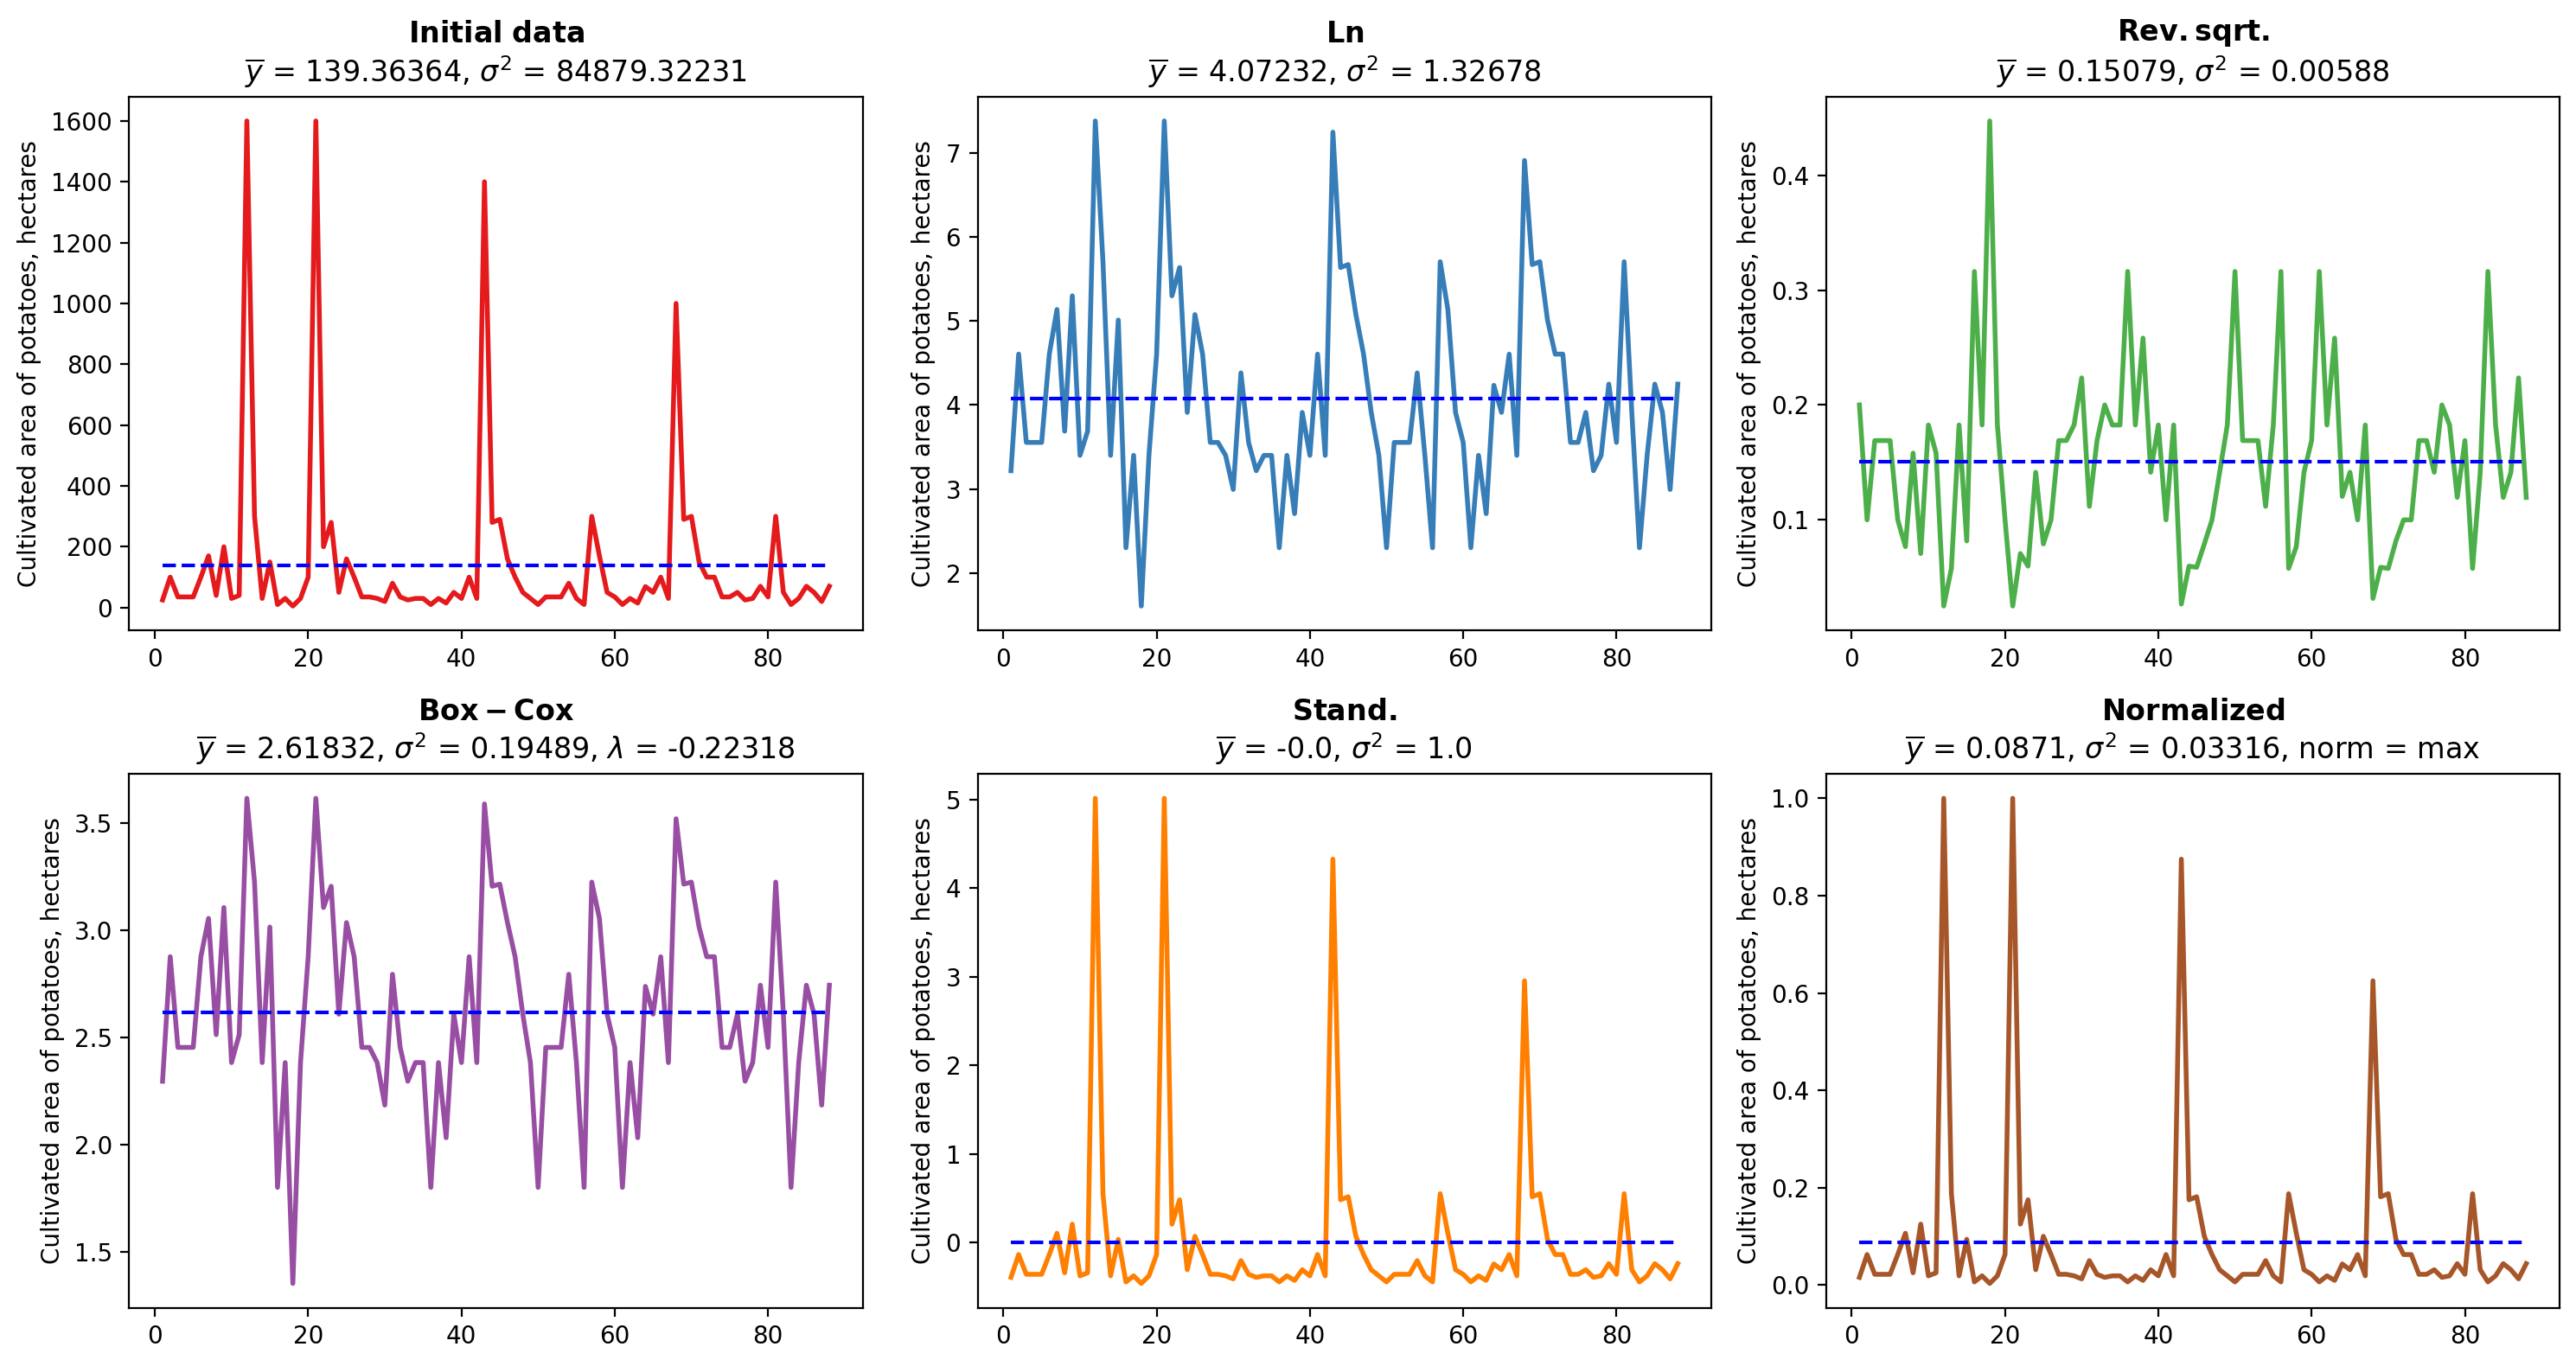

In [83]:




# Построение графиков с помощью вызова функций makeMultiPlot(),makeMultiHist()

makeMultiPlot()                   # Линейные графики

<ipython-input-82-815489456aca>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name)


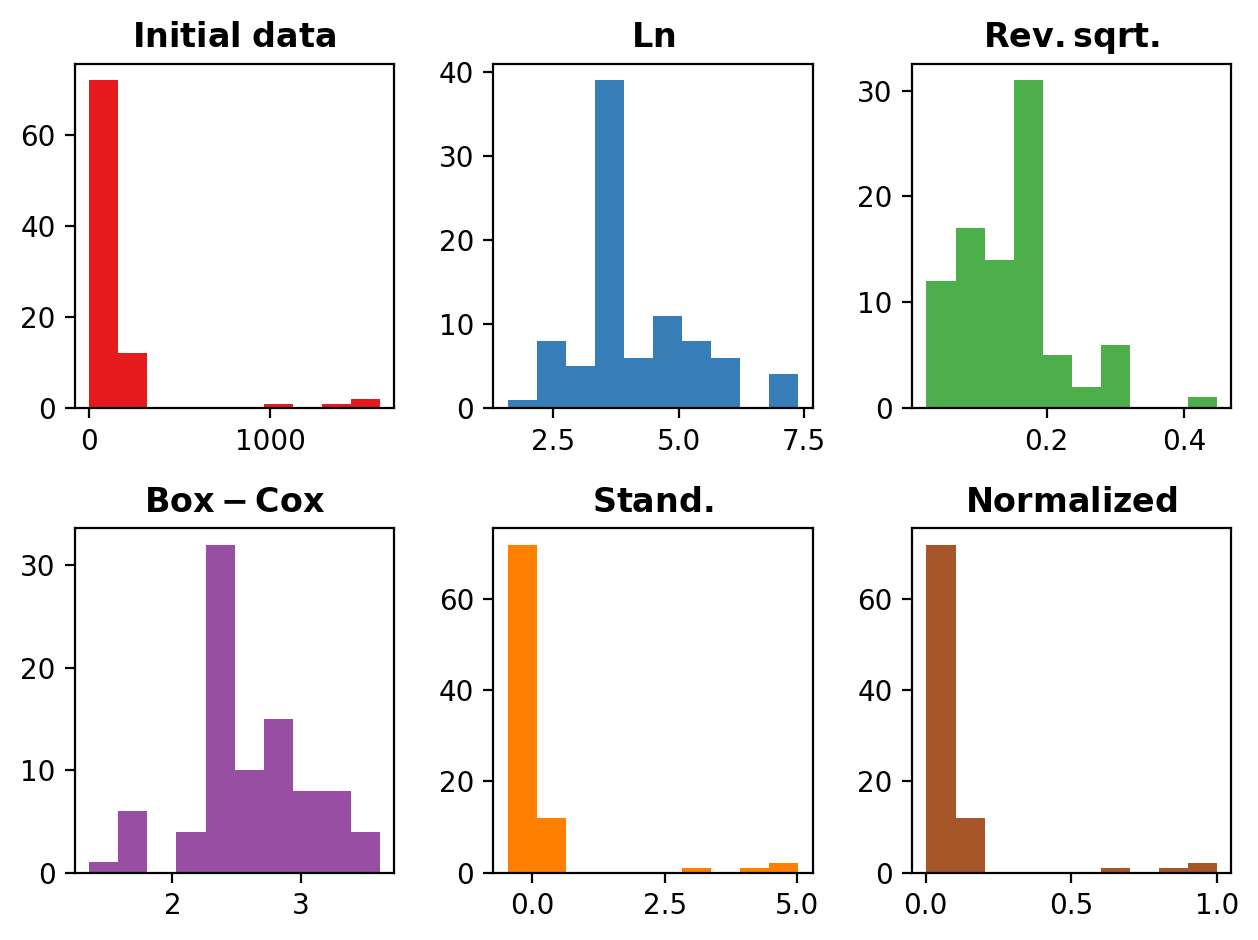

In [84]:


makeMultiHist(df = df_transform)  # Гистограммы распределения